epoch: 10, loss = 5479.8438
epoch: 20, loss = 4313.3911
epoch: 30, loss = 3518.4028
epoch: 40, loss = 2976.4651
epoch: 50, loss = 2606.9517
epoch: 60, loss = 2354.9509
epoch: 70, loss = 2183.0566
epoch: 80, loss = 2065.7803
epoch: 90, loss = 1985.7518
epoch: 100, loss = 1931.1310


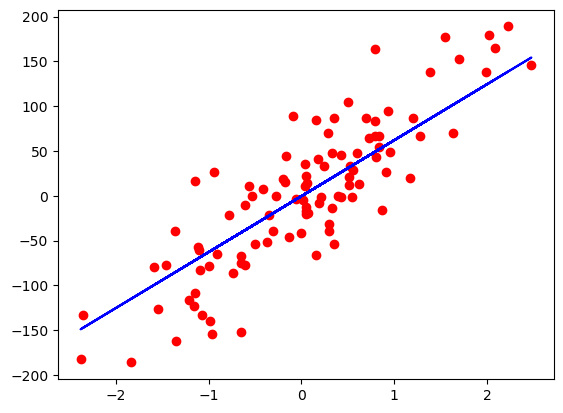

In [4]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=50, random_state=4)

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

In [6]:
import torch

# Step 1: Creating Tensors
# Create tensors of different shapes and types
# Tensor of zeros
tensor_zeros = torch.zeros(2, 3)
print("Tensor of Zeros:")
print(tensor_zeros)

# Tensor of ones with a specific data type
tensor_ones = torch.ones(2, 3, dtype=torch.int)
print("\nTensor of Ones:")
print(tensor_ones)

# Random tensor from a normal distribution
tensor_normal = torch.randn(2, 3)
print("\nTensor from Normal Distribution:")
print(tensor_normal)

# Step 2: More Tensor Operations
# Concatenation along a specified dimension
tensor_concat = torch.cat((tensor_zeros, tensor_ones), dim=1)
print("\nConcatenated Tensor:")
print(tensor_concat)

# Stacking tensors along a new dimension
tensor_stack = torch.stack((tensor_zeros, tensor_ones))
print("\nStacked Tensor:")
print(tensor_stack)

# Broadcasting: Operations between tensors of different shapes
tensor_broadcast = tensor_ones + 10
print("\nBroadcasted Tensor:")
print(tensor_broadcast)

# Step 3: Tensor Comparison Operations
# Comparison operations return boolean tensors
tensor_comp = torch.tensor([[1, 2, 3], [4, 5, 6]])
tensor_comp2 = torch.tensor([[1, 2, 3], [2, 3, 4]])
tensor_comp_result = tensor_comp == tensor_comp2
print("\nComparison Result:")
print(tensor_comp_result)

# Step 4: Additional Tensor Functions
# Compute the exponential of tensor elements
tensor_exp = torch.exp(tensor_normal)
print("\nExponential of Tensor:")
print(tensor_exp)

# Compute the element-wise absolute value
tensor_abs = torch.abs(tensor_normal)
print("\nAbsolute Value of Tensor:")
print(tensor_abs)

# Step 5: Accessing and Modifying Sub-Tensors
# Accessing sub-tensors using slicing
print("\nSliced Tensor:")
print(tensor_concat[:, 1:4])  # Access columns 1, 2, and 3

# Modifying sub-tensors
tensor_concat[:, 1:4] = 5
print("\nModified Sub-Tensor:")
print(tensor_concat)


Tensor of Zeros:
tensor([[0., 0., 0.],
        [0., 0., 0.]])

Tensor of Ones:
tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)

Tensor from Normal Distribution:
tensor([[ 0.8605, -0.4453, -0.3015],
        [ 1.3151,  0.7615,  1.0563]])

Concatenated Tensor:
tensor([[0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.]])

Stacked Tensor:
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])

Broadcasted Tensor:
tensor([[11, 11, 11],
        [11, 11, 11]], dtype=torch.int32)

Comparison Result:
tensor([[ True,  True,  True],
        [False, False, False]])

Exponential of Tensor:
tensor([[2.3643, 0.6407, 0.7397],
        [3.7250, 2.1416, 2.8758]])

Absolute Value of Tensor:
tensor([[0.8605, 0.4453, 0.3015],
        [1.3151, 0.7615, 1.0563]])

Sliced Tensor:
tensor([[0., 0., 1.],
        [0., 0., 1.]])

Modified Sub-Tensor:
tensor([[0., 5., 5., 5., 1., 1.],
        [0., 5., 5., 5., 1., 1.]])
